# EasyOCR

In [4]:
import easyocr
reader = easyocr.Reader(['ch_sim', 'en'])

In [47]:
result = reader.readtext('7img/13627.jpg')

In [ ]:
result

In [5]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open('7img/13627.jpg')

In [ ]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, result)

In [45]:
[line[1] for line in result]

['Awzz', 'HIen', 'Si/Ge', '昱', 'CLCCLOIL', '5', '76叭', '#。', 'Flzz']

# Paddle OCR

In [ ]:
# !python -m pip install paddlepaddle -i https://pypi.tuna.tsinghua.edu.cn/simple

In [ ]:
# !pip install "paddleocr>=2.0.1"

In [24]:
from paddleocr import PaddleOCR,draw_ocr
# Paddleocr suppolrts Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang='en') # need to run only once to download and load model into memory

[2023/07/21 10:34:06] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/muhammad/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/muhammad/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dic

In [40]:
img_path = '7img/13627.jpg'
result = ocr.ocr(img_path, cls=True)


[2023/07/21 10:49:56] ppocr DEBUG: dt_boxes num : 7, elapse : 0.24005961418151855
[2023/07/21 10:49:56] ppocr DEBUG: cls num  : 7, elapse : 0.05366373062133789
[2023/07/21 10:49:56] ppocr DEBUG: rec_res num  : 7, elapse : 0.4136815071105957


In [41]:

for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line[1][0])

7uzz.
Head
3175
Out
7eeLey
Fuzz
Head


In [42]:
# draw result
from PIL import Image
result = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores)
im_show = Image.fromarray(im_show)
im_show.save('result_easyOCR.jpg')

In [43]:
[line[1][0] for line in result[0]]

TypeError: 'float' object is not subscriptable

In [44]:
import cv2
def convert_to_yolo_format(bbox, image_width, image_height):
    # Unpack the bounding box coordinates
    x_min, y_min = bbox[0]
    x_max, y_max = bbox[2]
    
    # Ensure x_min < x_max and y_min < y_max
    if x_min > x_max:
        x_min, x_max = x_max, x_min
    if y_min > y_max:
        y_min, y_max = y_max, y_min
    
    # Calculate the center coordinates and dimensions
    x_center = (x_min + x_max) / (2.0 * image_width)
    y_center = (y_min + y_max) / (2.0 * image_height)
    width = (x_max - x_min) / image_width
    height = (y_max - y_min) / image_height
    
    return x_center, y_center, width, height

# Bounding box coordinates from PaddleOCR output
bounding_box = [[192.0, 201.0], [296.0, 208.0], [294.0, 240.0], [190.0, 234.0]]
image = cv2.imread(img_path)
image_width, image_height = image.shape[1], image.shape[0]  # Get image dimensions

# Convert to YOLO format
x_center, y_center, width, height = convert_to_yolo_format(bounding_box, image_width, image_height)

# Class index for text (you can assign different indices for different classes if needed)
class_index = 0

# YOLO-formatted label
yolo_label = f"{class_index} {x_center} {y_center} {width} {height}"
print(yolo_label)


0 0.3919354838709677 0.3556451612903226 0.16451612903225807 0.06290322580645161


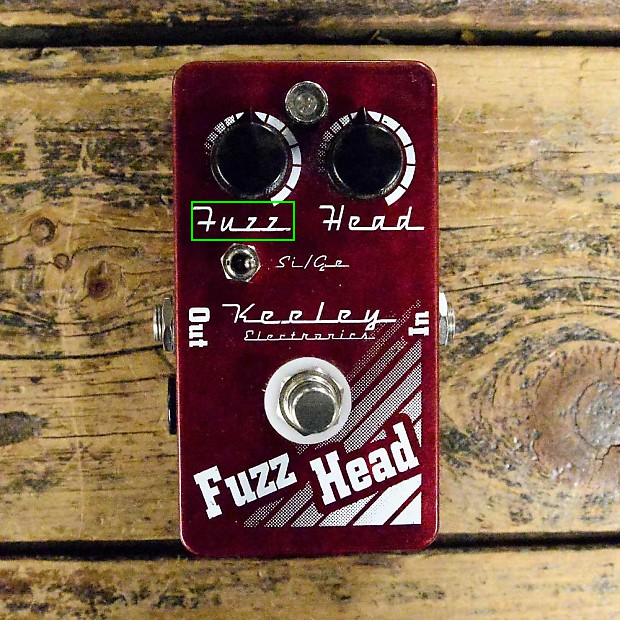

In [45]:
from PIL import Image, ImageDraw
from IPython.display import display

def draw_bbox_on_image(image, yolo_label, image_width, image_height):
    # Load the image
    draw = ImageDraw.Draw(image)

    # Convert the YOLO label back to absolute pixel values
    class_index, x_center, y_center, width, height = map(float, yolo_label.split())
    x_min = int((x_center - width / 2) * image_width)
    y_min = int((y_center - height / 2) * image_height)
    x_max = int((x_center + width / 2) * image_width)
    y_max = int((y_center + height / 2) * image_height)

    # Draw the bounding box on the image
    outline_color = (0, 255, 0)  # Green color (RGB format)
    line_thickness = 2
    draw.rectangle([x_min, y_min, x_max, y_max], outline=outline_color, width=line_thickness)

    # Show the image with the bounding box
    display(image)

# Bounding box coordinates from PaddleOCR output
image = Image.open(img_path)

image_width, image_height = image.size  # Get image dimensions

# Draw bounding box on the image and show it
draw_bbox_on_image(image, yolo_label, image_width, image_height)


In [ ]:
from paddleocr import PaddleOCR,draw_ocr
import cv2
from PIL import Image, ImageDraw
from IPython.display import display
import os

ocr = PaddleOCR(use_angle_cls=True, lang='en') # need to run only once to download and load model into memory

def convert_to_yolo_format(bbox, image_width, image_height):
    # Unpack the bounding box coordinates
    x_min, y_min = bbox[0]
    x_max, y_max = bbox[2]
    
    # Ensure x_min < x_max and y_min < y_max
    if x_min > x_max:
        x_min, x_max = x_max, x_min
    if y_min > y_max:
        y_min, y_max = y_max, y_min

    # Calculate the center coordinates and dimensions
    x_center = (x_min + x_max) / (2.0 * image_width)
    y_center = (y_min + y_max) / (2.0 * image_height)
    width = (x_max - x_min) / image_width
    height = (y_max - y_min) / image_height
    
    return x_center, y_center, width, height

for file_name in os.listdir('pedals'):
    if file_name.lower().endswith("png"):
        img_path = "pedals/"+file_name
        if not os.path.exists("png_labels/"+img_path.split('/')[-1].split('.')[0]+".txt"):
            result = ocr.ocr(img_path, cls=True)
            with open("png_labels/"+img_path.split('/')[-1].split('.')[0]+".txt", 'w') as new_file:    
                for idx in range(len(result)):
                    res = result[idx]
                    for line in res:
                        # print(line)
                        # Bounding box coordinates from PaddleOCR output
                        bounding_box = line[0]

                        image = cv2.imread(img_path)

                        image_width, image_height = image.shape[1], image.shape[0]  # Get image dimensions

                        # Convert to YOLO format
                        x_center, y_center, width, height = convert_to_yolo_format(bounding_box, image_width, image_height)

                        # Class index for text (you can assign different indices for different classes if needed)
                        class_index = 0

                        # YOLO-formatted label
                        yolo_label = "{} {:.6f} {:.6f} {:.6f} {:.6f}".format(line[1][0], x_center, y_center, width, height)

                        print(yolo_label)

                        new_file.write(yolo_label+"\n")

In [ ]:
import os 
for file in os.listdir("pedals"):
    print(file.lower().endswith(".jpg"))



In [2]:
!ls pedals | wc -l

/bin/bash: /home/muhammad/anaconda3/envs/knobs_detection_env/lib/libtinfo.so.6: no version information available (required by /bin/bash)
9485


In [102]:
# converting the labels into lowercase and removing space in between class name
import os 
for label_file in  os.listdir("png_labels"):
    label_list = []
    with open("png_labels/"+label_file, "r") as file:
        for line in file.readlines():
            # print((line.split()[:-4][0].lower().replace(" ", "_")+" "+line[-37:]).replace("  ", " "))
            label_list.append((line.split()[:-4][0].lower().replace(" ", "_")+" "+line[-37:]).replace("  ", " "))        
    
    with open("png_labels/"+label_file, "w") as file:
        file.writelines(label_list)

In [106]:
# reading all ocr_label fiels and making a class file
import os 
with open("ocr_class_file.txt", 'w') as all_labels_file:
    for label_file in  os.listdir("png_labels"):
        with open("png_labels/"+label_file, "r") as file:
            for line in file.readlines():
                # print(line[:-36])
                all_labels_file.write(line.split()[0]+"\n")



In [107]:
# Removing duplicacy in the class file
# Step 1: Read the content of the file
with open("ocr_class_file.txt", 'r') as class_file:
    content = class_file.read()

# Step 2: Split the content into words
words = content.split()

# Step 3: Create a set to store unique words
unique_words = set()

# Step 4: Iterate over the words, adding them to the set
for word in words:
    unique_words.add(word)

# Step 5: Write the unique words back to the file
with open("ocr_class_file_unique.txt", 'w') as unique_file:
    unique_file.write("\n".join(unique_words))

In [108]:
# # Step 1: Read the content of both files and split them into words
# with open("/media/muhammad/Projects1/knobs_detection/ocr_class_file_unique.txt", 'r') as file1:
#     content1 = file1.read()

# with open("files/ocr_class_file_unique.txt", 'r') as file2:
#     content2 = file2.read()

# words1 = set(content1.split())
# words2 = set(content2.split())

# # Step 2: Find the words that are unique to the first file (not in the second file)
# unique_words_in_file1 = words1 - words2

# # Step 3: Write the unique words into another file
# with open("unique_words_file1.txt", 'w') as unique_words_file:
#     unique_words_file.write("\n".join(unique_words_in_file1))


In [110]:
# changing the class name to the index
import os 
classes_list = []
with open("files/ocr_class_file_unique.txt", 'r') as all_labels_file:
    classes_list = all_labels_file.readlines()

for label_file in  os.listdir("png_labels"):
    label_list = []
    with open("png_labels/"+label_file, "r") as file:
        for line in file.readlines():
            try: 
                label_list.append(line.replace(line.split()[0], str(classes_list.index(line.split()[0]+"\n"))))
                # print(line)
            except:
                pass
            # print(classes_list.index(line.split()[0]+'\n'))
            # break

    # break
            # label_list.append(line)        
    with open("png_labels/"+label_file, "w") as file:
        file.writelines(label_list)

In [4]:
import os
txt_file_list = os.listdir('/media/muhammad/Projects1/knobs_detection/ocr_labels')
with open('file.txt', 'r') as txt_file:
    for line in txt_file.readlines():
        line  = line.split('.')[0]
        if txt_file_list.index(line+'.txt'):
            os.system('cp {} {}'.format('/media/muhammad/Projects1/knobs_detection/ocr_labels/'+line+'.txt', '/media/muhammad/Projects1/knobs_detection/rizwan/'))
            # print(line)